REMEMBER TO CHECK ALL THIS CODE AND MAKE SURE I UNDERSTAND WHAT IT IS DOING AND REWRITE WHERE I CAN

In [17]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
df = pd.read_excel("Dataset 5944.xlsx")

# Ensures type numeric to prevent issues during statistical analysis
groupNo = pd.to_numeric(df.iloc[2:26, 1])
weightGain = pd.to_numeric(df.iloc[2:26, 2])

# Define group names
groupNames = ['Standard Diet', 'Junk Food', 'Reduced Diet']
uniqueGroups = np.unique(groupNo)

# Groups weights for analysis
groupedWeights = [weightGain[groupNo == i] for i in uniqueGroups]

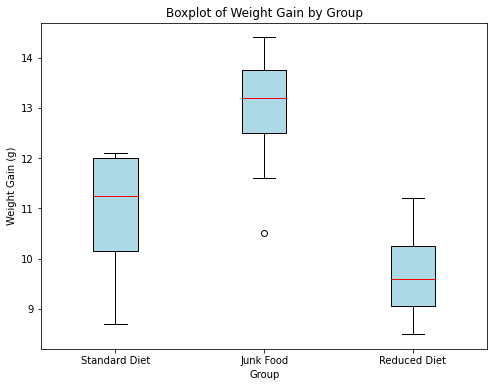

In [14]:
# Boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(groupedWeights, labels=groupNames, patch_artist=True, boxprops=dict(facecolor="lightblue", color="black"), medianprops=dict(color="red"))
plt.title("Boxplot of Weight Gain by Group")
plt.xlabel("Group")
plt.ylabel("Weight Gain (g)")
plt.show()

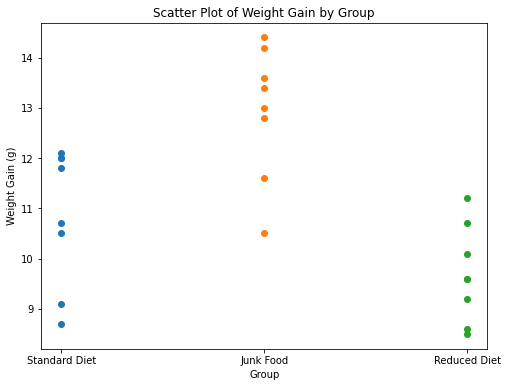

In [52]:
# Scatter Plot
plt.figure(figsize=(8, 6))
for i in uniqueGroups:
    plt.scatter([i] * len(weightGain[groupNo == i]), weightGain[groupNo == i]) # this line might be further editable
plt.title("Scatter Plot of Weight Gain by Group")
plt.xlabel("Group")
plt.ylabel("Weight Gain (g)")
plt.xticks(ticks=np.arange(1, len(groupNames) + 1), labels=groupNames) # same with this one
plt.show()

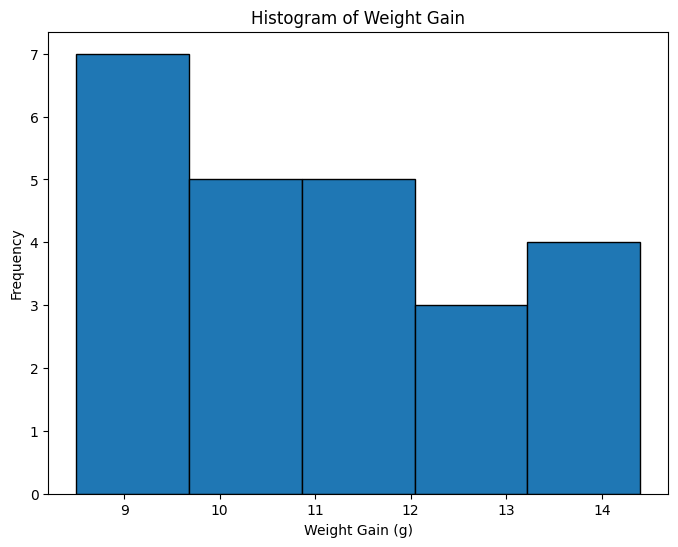

In [60]:
# Histogram
plt.figure(figsize=(8, 6))
plt.hist(weightGain, bins=5, edgecolor='black')
plt.title("Histogram of Weight Gain")
plt.xlabel("Weight Gain (g)")
plt.ylabel("Frequency")
plt.show()

(STILL NEEDS SIGNIFICANT EDITING)

To visually analyze the data, I chose to use a boxplot, scatter plot, and histogram.

The boxplot was chosen to visualize the distribution of weight gain within different groups. It provides a clear summary of the central tendency, variability, and potential outliers in the data. By displaying the median, quartiles, and outliers, the boxplot helps to identify the spread of data points and any potential skewness or extreme values in weight gain across the groups.

The scatter plot was selected to examine the relationship between group categories and the corresponding weight gain values. It helps identify patterns, trends, or clusters of data points, allowing us to visually inspect how weight gain varies across different groups. By plotting individual data points, the scatter plot provides insight into the variance and distribution within each group, facilitating the detection of possible correlations or group differences.

The histogram was chosen to understand the overall distribution of weight gain values across all observations. It reveals the frequency of different ranges of weight gain, helping to identify whether the data is normally distributed, skewed, or has multiple peaks. The histogram is an excellent tool for understanding the general shape of the data and identifying patterns such as skewness, bimodality, or uniformity.

Together, these three plots offer a comprehensive view of the data, allowing for the detection of trends, variability, and potential outliers, while also highlighting the overall distribution and the relationships between weight gain and group categories.

In [38]:
# Descriptive Statistics
descStats = []
for i in uniqueGroups:
    groupWeights = weightGain[groupNo == i]
    mean = np.mean(groupWeights)
    median = np.median(groupWeights)
    std_dev = np.std(groupWeights, ddof=1)  # Sample standard deviation
    sem = stats.sem(groupWeights)
    descStats.append((groupNames[i-1], mean, median, std_dev, sem))

desc_df = pd.DataFrame(descStats, columns=['Group', 'Mean', 'Median', 'Std Dev', 'SEM'])
print(desc_df)

           Group     Mean  Median   Std Dev       SEM
0  Standard Diet  10.8625   11.25  1.359556  0.480676
1      Junk Food  12.9375   13.20  1.316855  0.465579
2   Reduced Diet   9.6875    9.60  0.950845  0.336175


In [72]:
# Inferential Statistics
# what significant figues should I display to?
alpha = 0.05

# Shapiro-Wilk Test for Normality
for i in uniqueGroups:
    stat, p_value = stats.shapiro(groupedWeights[i-1])
    if p_value >= alpha:
        print(f"Shapiro-Wilk Test for Group {i}: p-value = {p_value}, Group is normal.")
    else:
        print(f"Shapiro-Wilk Test for Group {i}: p-value = {p_value}, Group is not normal.")

# ANOVA can be performed due to normality of data
anovaResult = stats.f_oneway(*groupedWeights)
print("ANOVA result:", anovaResult)

# Bonferroni correction
bonferroniAlpha = alpha/len(uniqueGroups)
print("Bonferroni-corrected alpha:", bonferroniAlpha)

# Post-hoc test
for i in range(len(uniqueGroups)):
    for j in range(i + 1, len(uniqueGroups)):
        groupA = weightGain[groupNo == uniqueGroups[i]]
        groupB = weightGain[groupNo == uniqueGroups[j]]
        t_stat, p_val = stats.ttest_ind(groupA, groupB)
        if p_val < bonferroniAlpha:
            print(f"{groupNames[i]} vs {groupNames[j]} p = {p_val} (Significant)")
        else:
            print(f"{groupNames[i]} vs {groupNames[j]} p = {p_val} (Not Significant)")

Shapiro-Wilk Test for Group 1: p-value = 0.077657550573349, Group is normal.
Shapiro-Wilk Test for Group 2: p-value = 0.44342753291130066, Group is normal.
Shapiro-Wilk Test for Group 3: p-value = 0.738517165184021, Group is normal.
ANOVA result: F_onewayResult(statistic=14.486447761194034, pvalue=0.00011132435759914632)
Bonferroni-corrected alpha: 0.016666666666666666
Standard Diet vs Junk Food p = 0.007820372688376398 (Significant)
Standard Diet vs Reduced Diet p = 0.06491090682166605 (Not Significant)
Junk Food vs Reduced Diet p = 5.892551975047918e-05 (Significant)


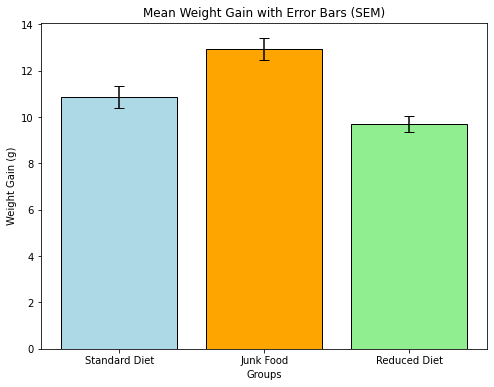

In [68]:
# Bar Plot with Error Bars
plt.figure(figsize=(8, 6))
plt.bar(groupNames, desc_df['Mean'], yerr=desc_df['SEM'], capsize=5, color=['lightblue', 'orange', 'lightgreen'], edgecolor='black')
plt.title("Mean Weight Gain with Error Bars (SEM)")
plt.ylabel("Weight Gain (g)")
plt.xlabel("Groups")
plt.show()

(CHATGPT) 
The descriptive statistics show differences in the mean weight gains between groups, with Junk Food showing the highest mean and Reduced Diet the lowest. Variability, as indicated by the standard deviation, was consistent across groups.

An ANOVA revealed significant differences in weight gain between the groups (p < 0.05). To identify specific group differences, pairwise t-tests with a Bonferroni correction were conducted to control for multiple comparisons. Results showed significant differences between Junk Food and both Standard Diet and Reduced Diet groups (p < Bonferroni-corrected α), while the comparison between the Standard and Reduced Diet groups were not significant. The use of the Bonferroni correction minimizes Type I error, ensuring robust findings. A bar plot was used to visually represent mean differences with Standerd Error of the Means as error bars, emphasizing the variability and significance of group differences.

This study aimed to compare the effects of three different diets—Standard, Junk food, and Reduced—on weight gain. Descriptive statistics indicated notable differences in weight gain across the groups. The Junk food group showed the highest weight gain, with several outliers. The Standard diet resulted in moderate weight gain, while the Reduced diet group showed the lowest overall weight gain, though with considerable variation.
Inferential statistics, specifically ANOVA, confirmed significant differences in weight gain between the groups. Post-hoc Bonferroni corrections showed that the Junk food group had significantly higher weight gain than both the Standard diet and Reduced diet groups. However, no significant difference was found between the Standard diet and Reduced diet groups. These results suggest that the Junk food diet leads to higher weight gain compared to the others, but reducing caloric intake did not produce a significantly different outcome compared to a regular diet.

Several limitations were noted in the study design. Sample size was one major issue; a small sample size reduces statistical power, increasing the likelihood of Type II errors (failing to detect real effects). Increasing the sample size would help to confirm the findings and provide more reliable conclusions.
Another limitation was the potential for confounding variables, such as baseline weight, physical activity, or metabolic rates, which were not controlled for. These factors could have influenced the results and introduced bias. Future studies should either randomize participants into diet groups or measure and adjust for these factors to avoid confounding.
The study’s statistical power could also have been improved with a larger sample size. A higher-powered study would be more likely to detect significant differences, especially between the Standard diet and Reduced diet groups, where differences were not significant in this study.

To address these limitations, several improvements are recommended:
1.	Increase Sample Size: Conducting a power analysis to determine an appropriate sample size would ensure the study has sufficient power to detect meaningful differences.
2.	Control Confounding Variables: Random assignment or baseline measurements would help control for variables like physical activity and metabolism, reducing bias.
3.	Longitudinal Design: A longer study could track weight gain over time, providing a more complete understanding of the effects of the diets.
4.	Statistical Adjustments: Using techniques like ANCOVA to control for baseline differences or applying more stringent significance thresholds could enhance the accuracy of the results.

In conclusion, this study found that the Junk food diet led to significantly greater weight gain compared to the Standard diet and Reduced diet, with no significant difference between the latter two. Despite the study's limitations—such as sample size and uncontrolled confounding variables—these results highlight the importance of diet in weight management. Future research should focus on increasing sample sizes, controlling confounding variables, and using more sophisticated statistical methods to better understand diet-related weight changes.
